### Lasso Regression

- It is also called L1 Regularization
- It prevents overfitting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

#### Appying normal linear regression

Coefficient  [28.16404017]
Intercept:  -2.7130725669241036


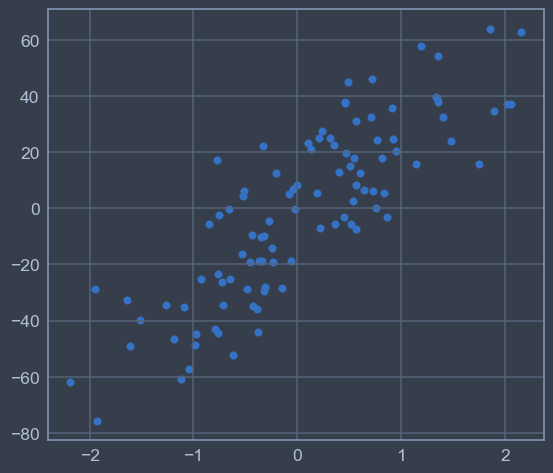

In [2]:
# creating a dummy dataset of 100 points

X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)
print("Coefficient ",lr.coef_)
print("Intercept: ",lr.intercept_)

c:\Users\Abhishek\anaconda3\envs\demo\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Abhishek\anaconda3\envs\demo\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Abhishek\anaconda3\envs\demo\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+04, tolerance: 7.701e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV in

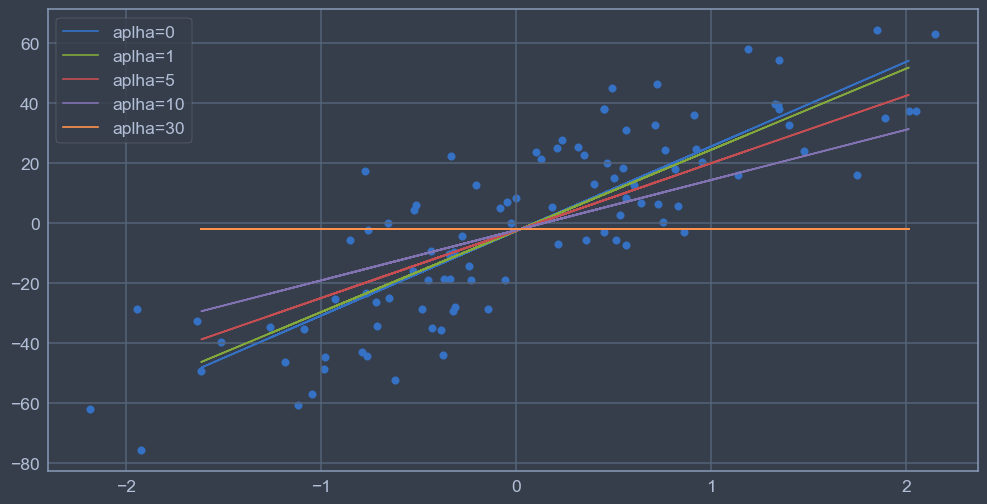

In [4]:
alphas=[0,1,5,10,30]


plt.figure(figsize=(12,6))
plt.scatter(X,y)

for i in alphas:
    L=Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='aplha={}'.format(i))
plt.legend()
plt.show()

## How Coefficients are affected after applying lasso regression

In [5]:
from sklearn.datasets import load_diabetes

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [6]:
data=load_diabetes()

df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [24]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,random_state=42)

In [25]:
coefs=[]
r2_scores=[]

for i in [0,0.1,1,10]:
    reg=Lasso(alpha=i)
    #apply lasso for different value of i on the training data
    reg.fit(X_train,y_train)

    #after applying lasso - take out the coefficients and add the value to the list
    coefs.append(reg.coef_.tolist())

    y_pred=reg.predict(X_test)

    r2_scores.append(r2_score(y_test,y_pred))

c:\Users\Abhishek\anaconda3\envs\demo\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Abhishek\anaconda3\envs\demo\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Abhishek\anaconda3\envs\demo\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV in

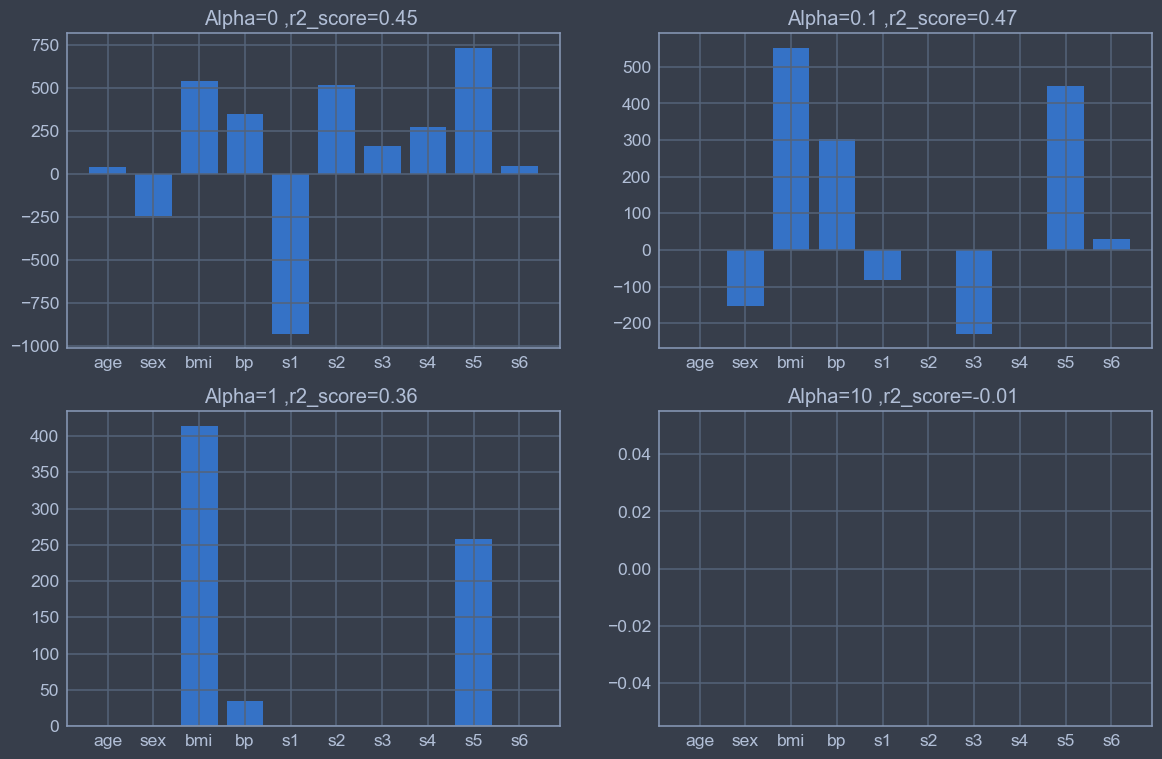

In [26]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha=0 ,r2_score={} '.format(round(r2_scores[0],2)))


plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha=0.1 ,r2_score={} '.format(round(r2_scores[1],2)))


plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha=1 ,r2_score={} '.format(round(r2_scores[2],2)))


plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha=10 ,r2_score={} '.format(round(r2_scores[3],2)))

plt.show()

#### As per the above graph lasso can help in feature importance/feature selection
- In the third graph we have only three columns left bmi,bp, s5



## Higher Coefficients are affected more

In [27]:
alphas=[0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs=[]

for i in alphas:
    reg=Lasso(alpha=i)
    reg.fit(X_train,y_train)
     
    coefs.append(reg.coef_.tolist())

c:\Users\Abhishek\anaconda3\envs\demo\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Abhishek\anaconda3\envs\demo\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Abhishek\anaconda3\envs\demo\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV in

In [28]:
input_array=np.array(coefs)

coefs_df=pd.DataFrame(input_array,columns=data.feature_names)
coefs_df['alpha']=alphas
coefs_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,37.904021,-241.964362,542.428759,347.703844,-931.488838,518.062271,163.419980,275.317901,736.198856,48.670657
0.0001,37.891667,-241.878244,542.524544,347.624893,-924.832045,513.033268,160.224210,274.036385,733.762619,48.690013
0.0010,37.780431,-241.103200,543.386372,346.914418,-864.934721,467.782935,131.468467,262.504646,711.841733,48.864159
0.0100,35.347451,-231.906664,551.303242,341.313469,-483.567140,165.990532,-25.834899,216.875803,566.815003,49.702475
0.1000,0.000000,-152.664779,552.697775,303.365158,-81.365007,-0.000000,-229.255776,0.000000,447.919525,29.642617
1.0000,0.000000,-0.000000,413.431848,34.830515,0.000000,0.000000,-0.000000,0.000000,258.152894,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


- as alpha values increases all the coefficients appraoches 0 and finally all of them becomes ZERO
- we need to check r2 score also to pick the best value for alpha
    - negative alpha score means the model's performance is very poor for that alpha value

## Let's see the graph of alpha/lamda and coefficients

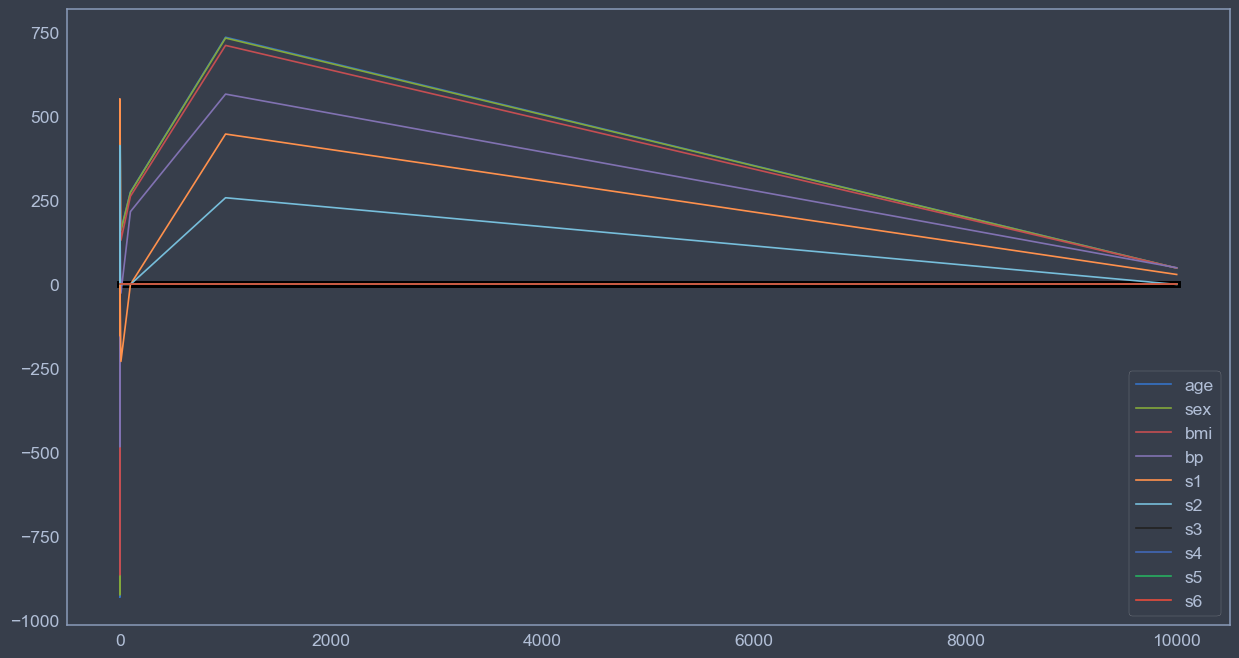

In [32]:

# transpose of the coefficient matrx for different values of alpha
input_array=np.array(coefs)


plt.figure(figsize=(15,8))

plt.plot(alphas,np.zeros(len(alphas)), color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.grid(False)
plt.legend()

## Impact on Bais and Variance

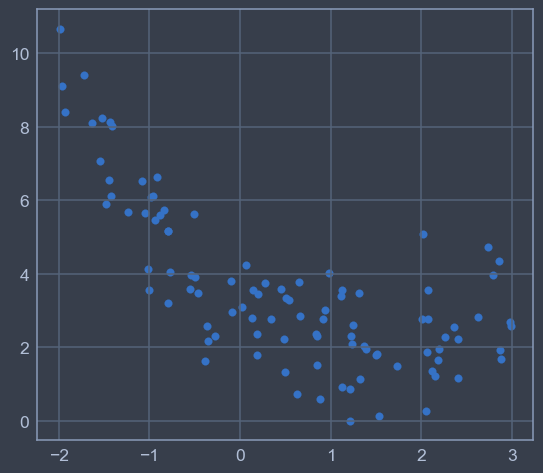

In [33]:
m=100
X=5*np.random.rand(m,1)-2
y=0.7*X**2 - 2*X + 3 +np.random.randn(m,1)
plt.scatter(X,y)
plt.show()